In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from collections import defaultdict
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df_total = pd.read_csv('dat_total.csv')
df_total

,Unnamed: 0,artist,name,popularity,genre,lyrics
0,0,Steady Rollin,I Feel Alive,0,rock,the trees are singing in the wind the sky blue...
1,1,Bell Biv DeVoe,Poison,0,r&b,na yeah spyderman and freeze in full effect uh...
2,2,CeeLo Green,Baby It's Cold Outside (feat. Christina Aguilera),0,r&b,i really cant stay baby its cold outside ive g...
3,3,KARD,Dumb Litty,0,pop,get up out of my business you dont keep me fro...
4,4,James TW,Soldier,1,r&b,hold your breath dont look down keep trying da...
...,...,...,...,...,...,...
15400,15400,NAV,Some Way,1,r&b,yeah nah nah nah nah nah nah nah nah nah nah n...
15401,15401,Qulinez,Rising Like The Sun - Radio Mix,0,edm,caught up in such a head rush wideeyed lately ...
15402,15402,Nicki Minaj,Anaconda,0,pop,my anaconda dont my anaconda dont my anaconda ...
15403,15403,Ponderosa Twins Plus One,Bound,0,r&b,bound bound bound bound bound to fall in love ...


In [3]:
def split_data(features, labels):
  xTrain, xTest, yTrain, yTest = train_test_split(features, labels, test_size = 0.3, random_state = 1)
  return xTrain, xTest, yTrain, yTest

In [4]:
total_xTrain, total_xTest, total_yTrain, total_yTest = split_data(df_total['lyrics'], df_total['popularity'])

In [5]:
def build_vocab_map(df):

    # create a default dict for counting unique vocabs in each email
    vocab_counts = defaultdict(int)

    # for every email
    for i in range(df.shape[0]):
        # create a list of vocabs of the email
        vocabs = df.iloc[i].split(" ")
        # make list into a list of unique vocabs
        vocabs = set(vocabs)
        # for each unique vocabs
        for vocab in vocabs:
            # count unique vocabs in each email
            vocab_counts[vocab] += 1

    # create a dictionary for the vocabulary map
    vocab_map = {}

    # for every vocab and its counts
    for word, count in vocab_counts.items():
        # select the words that appear in at least 30 emails
        if count >= 30:
            vocab_map[word] = count

    if '' in vocab_map:
      vocab_map.pop('', None)

    return vocab_map

In [6]:
total_vocab = build_vocab_map(total_xTrain)
len(total_vocab.keys())

3509

In [7]:
def construct_binary(train_df, vocab_map):
  
    # create a list of words for the vocab map
    frequent_words = list(vocab_map.keys())

    # initialize the binary dataset
    binary_train = np.zeros((train_df.shape[0], len(frequent_words)))

    # for each email
    for i in range(train_df.shape[0]):
        # create a list of unique vocabs in an email
        vocabs = train_df.iloc[i].split(" ")
        vocabs = set(vocabs)

        # for each words in the vocabulary map
        for j in range(len(frequent_words)):
            # if the words in the vocabulary map is in the email
            if frequent_words[j] in vocabs:
                # set vector as 1
                binary_train[i, j] = 1

    return pd.DataFrame(binary_train, columns = frequent_words)

In [8]:
def construct_count(train_df, vocab_map):

    # create a list of words for the vocab map
    frequent_words = list(vocab_map.keys())

    # initialize the count dataset
    count_train = np.zeros((train_df.shape[0], len(frequent_words)))

    # for each email
    for i in range(train_df.shape[0]):
        # create a list of vocabs in an email
        vocabs = train_df.iloc[i].split(" ")

        # for each words in the vocabulary map
        for j in range(len(frequent_words)):
            # count the number of times the jth word appears in the email
            count_train[i,j] = vocabs.count(frequent_words[j])
    
    return pd.DataFrame(count_train, columns = frequent_words)

In [9]:
def construct_all(xTrain, xTest, vocab_list):
  binary_train = construct_binary(xTrain, vocab_list)
  binary_test = construct_binary(xTest, vocab_list)
  count_train = construct_count(xTrain, vocab_list)
  count_test = construct_count(xTest, vocab_list)
  return binary_train, binary_test, count_train, count_test

In [10]:
total_binary_train, total_binary_test, total_count_train, total_count_test = construct_all(total_xTrain, total_xTest, total_vocab)

In [11]:
total_binary_train

,can,high,said,you,to,reality,in,his,be,oh,...,homeboys,ended,bridges,jaw,rider,purse,dot,bail,shock,devotion
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10779,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10780,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10781,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
total_count_train

,can,high,said,you,to,reality,in,his,be,oh,...,homeboys,ended,bridges,jaw,rider,purse,dot,bail,shock,devotion
0,1.0,1.0,1.0,1.0,17.0,1.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,2.0,13.0,0.0,1.0,0.0,1.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,0.0,0.0,28.0,5.0,0.0,0.0,0.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,0.0,0.0,41.0,7.0,0.0,7.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,12.0,12.0,0.0,10.0,1.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10778,1.0,0.0,1.0,7.0,16.0,0.0,31.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10779,0.0,0.0,0.0,0.0,7.0,0.0,3.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10780,0.0,0.0,0.0,10.0,2.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10781,6.0,0.0,0.0,12.0,18.0,0.0,2.0,0.0,16.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
total_binary_test

,can,high,said,you,to,reality,in,his,be,oh,...,homeboys,ended,bridges,jaw,rider,purse,dot,bail,shock,devotion
0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4618,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4619,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4620,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
total_count_test

,can,high,said,you,to,reality,in,his,be,oh,...,homeboys,ended,bridges,jaw,rider,purse,dot,bail,shock,devotion
0,0.0,0.0,0.0,10.0,3.0,0.0,7.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,10.0,8.0,0.0,0.0,0.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,136.0,24.0,0.0,22.0,4.0,12.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,2.0,9.0,9.0,0.0,0.0,0.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,29.0,1.0,0.0,4.0,0.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4617,0.0,0.0,1.0,46.0,3.0,0.0,8.0,0.0,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4618,0.0,0.0,2.0,8.0,6.0,0.0,13.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4619,1.0,0.0,0.0,8.0,4.0,0.0,5.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4620,0.0,0.0,0.0,1.0,8.0,0.0,2.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def pos_neg_words(model, word_dict):
  word_list = list(word_dict.keys())
  pos_indices = np.argsort(model.coef_[0])[::-1]
  words_pos = []
  for i in range(15):
      index = pos_indices[i]
      words_pos.append(word_list[index])
  
  neg_indices = np.argsort(model.coef_[0])
  words_neg = []
  for i in range(15):
      index = neg_indices[i]
      words_neg.append(word_list[index])

  return words_pos, words_neg

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

def perceptron_optimal(xTrain, yTrain, word_list):

  max_iters = [1, 10, 20, 40, 80, 120, 150]
  learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]

  plt.figure(figsize=(12, 8))  # Create a figure

  # Plot number of mistakes based on max_iter for different learning rates
  for lr in learning_rates:
    mistakes = []

    for max_iter in max_iters:
      model = Perceptron(random_state=1, max_iter=max_iter, eta0=lr)
      model.fit(xTrain, yTrain)

      predictions = model.predict(xTrain)

      num_mistakes = sum(predictions != yTrain)

      mistakes.append(num_mistakes)

    # Plot the line for current learning rate
    label = 'Learning Rate = {}'.format(lr)
    plt.plot(max_iters, mistakes, '-', label=label)

  plt.xlabel('Max Iterations')
  plt.ylabel('Number of Mistakes')
  plt.legend()
  plt.title('Number of Mistakes vs. Max Iterations for Different Learning Rates')
  plt.show()


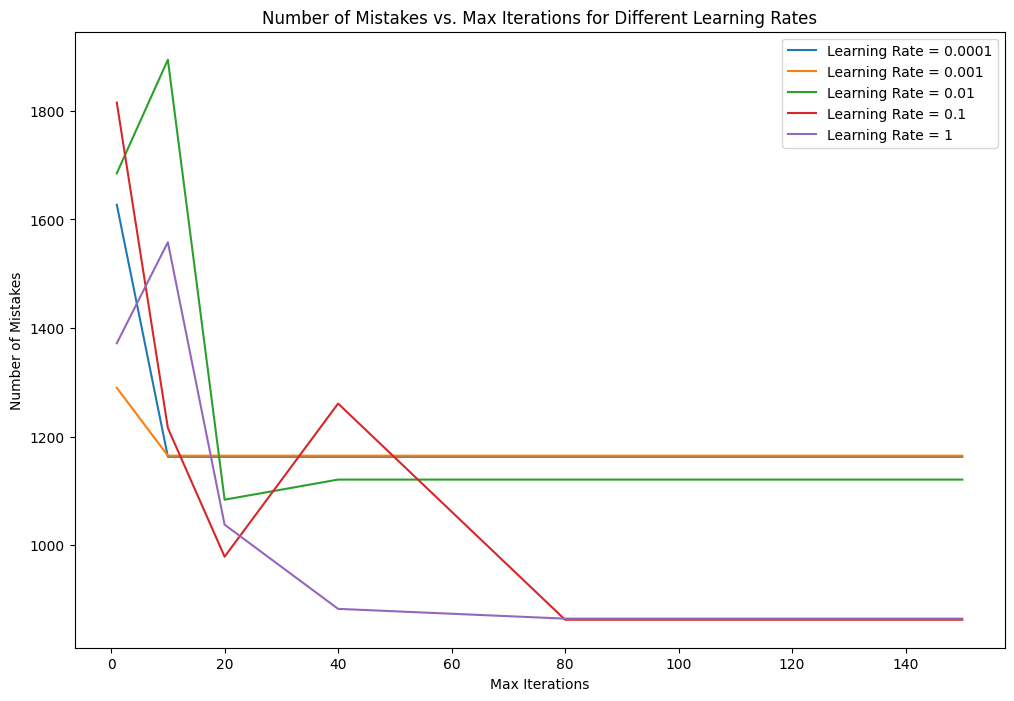

In [53]:
perceptron_optimal(total_binary_train, total_yTrain, total_vocab)

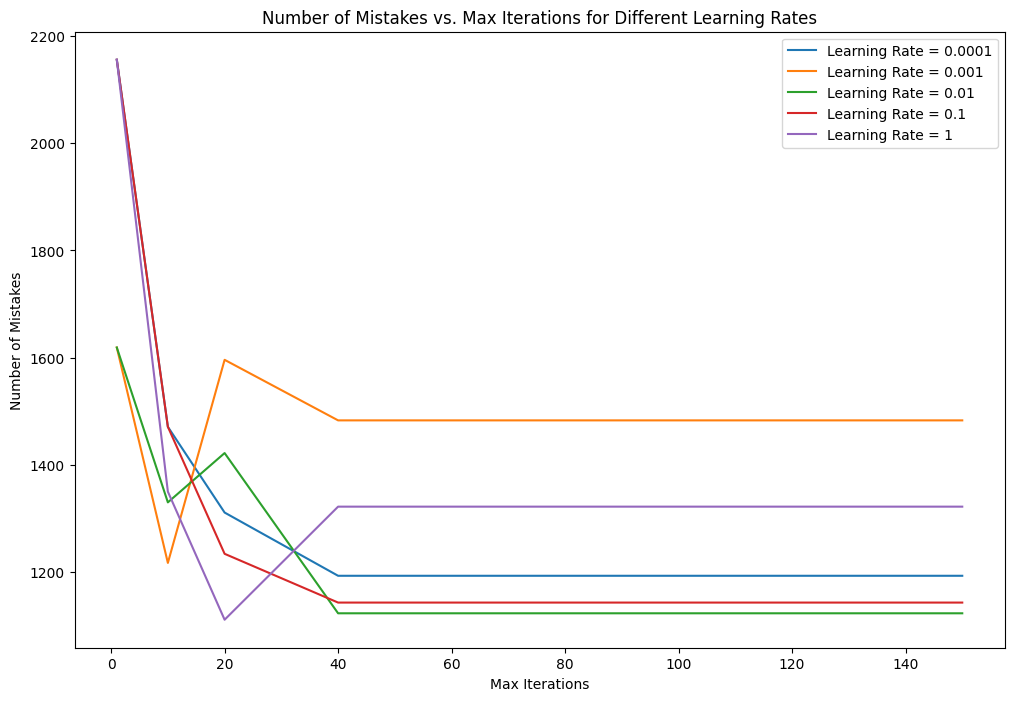

In [18]:
perceptron_optimal(total_count_train, total_yTrain, total_vocab)

In [19]:
total_max_iters = [80, 40]
total_learning_rates = [1, 0.01]

In [20]:
def perceptron_accuracy(binary_train, binary_test, count_train, count_test, yTrain, yTest, word_list, max_iters, learning_rates):
  model_binary = Perceptron(random_state = 1, max_iter = max_iters[0], eta0 = learning_rates[0])
  model_binary.fit(binary_train, yTrain)
  model_count = Perceptron(random_state = 1, max_iter = max_iters[1], eta0 = learning_rates[1])
  model_count.fit(count_train, yTrain)
  predictions_binary_train = model_binary.predict(binary_train)
  predictions_binary_test = model_binary.predict(binary_test)
  predictions_count_train = model_count.predict(count_train)
  predictions_count_test = model_count.predict(count_test)
  num_mistakes_binary_train = sum(predictions_binary_train != yTrain)
  num_mistakes_binary_test = sum(predictions_binary_test != yTest)
  num_mistakes_count_train = sum(predictions_count_train != yTrain)
  num_mistakes_count_test = sum(predictions_count_test != yTest)
  print("Number of mistakes on binary train data: ", num_mistakes_binary_train)
  print("Number of mistakes on binary test data: ", num_mistakes_binary_test)
  print("Number of mistakes on count train data: ", num_mistakes_count_train)
  print("Number of mistakes on count test data: ", num_mistakes_count_test)
  binary_train_score = accuracy_score(predictions_binary_train, yTrain)
  print("Accuracy score on binary train data: ", binary_train_score)
  binary_test_score = accuracy_score(predictions_binary_test, yTest)
  print("Accuracy score on binary test data: ", binary_test_score)
  count_train_score = accuracy_score(predictions_count_train, yTrain)
  print("Accuracy score on count train data: ", count_train_score)
  count_test_score = accuracy_score(predictions_count_test, yTest)
  print("Accuracy score on count test data: ", count_test_score)
  
  binary_pos, binary_neg = pos_neg_words(model_binary, word_list)
  count_pos, count_neg = pos_neg_words(model_count, word_list)

  print("15 most positive words for binary model: ")
  print(binary_pos)
  print("15 most negative words for binary model: ")
  print(binary_neg)
  print("15 most positive words for count model: ")
  print(count_pos)
  print("15 most negative words for count model: ")
  print(count_neg)

In [21]:
print("Accuracy score on total dataset")
perceptron_accuracy(total_binary_train, total_binary_test, total_count_train, total_count_test, total_yTrain, total_yTest, total_vocab, total_max_iters, total_learning_rates)

Accuracy score on total dataset
Number of mistakes on binary train data:  865
Number of mistakes on binary test data:  857
Number of mistakes on count train data:  1123
Number of mistakes on count test data:  692
Accuracy score on binary train data:  0.9197811369748679
Accuracy score on binary test data:  0.814582431847685
Accuracy score on count train data:  0.8958545859222851
Accuracy score on count test data:  0.8502812635222847
15 most positive words for binary model: 
['j', 'ticking', 'balling', 'softly', 'smith', 'eastside', 'apartment', 'visit', 'cups', 'crunk', 'drew', 'weird', 'section', 'complain', 'meal']
15 most negative words for binary model: 
['cuz', 'aye', 'lower', 'everytime', 'risk', 'don', 'dub', 'reckless', 'patiently', 'headed', 'shootin', 'porsche', 'surely', 'anger', 'created']
15 most positive words for count model: 
['dawg', 'plans', 'rains', 'walkin', 'songs', 'hopin', 'electric', 'mornin', 'citys', 'tie', 'shape', 'mmmm', 'teeth', 'learning', 'impossible']
15

In [22]:
df_edm = pd.read_csv('dat_edm.csv') 
df_latin = pd.read_csv('dat_latin.csv')
df_pop = pd.read_csv('dat_pop.csv')
df_rap = pd.read_csv('dat_rap.csv')
df_rb = pd.read_csv('dat_rb.csv')
df_rock = pd.read_csv('dat_rock.csv')

In [23]:
edm_xTrain, edm_xTest, edm_yTrain, edm_yTest = split_data(df_edm['lyrics'], df_edm['popularity'])
latin_xTrain, latin_xTest, latin_yTrain, latin_yTest = split_data(df_latin['lyrics'], df_latin['popularity'])
pop_xTrain, pop_xTest, pop_yTrain, pop_yTest = split_data(df_pop['lyrics'], df_pop['popularity'])
rap_xTrain, rap_xTest, rap_yTrain, rap_yTest = split_data(df_rap['lyrics'], df_rap['popularity'])
rb_xTrain, rb_xTest, rb_yTrain, rb_yTest = split_data(df_rb['lyrics'], df_rb['popularity'])
rock_xTrain, rock_xTest, rock_yTrain, rock_yTest = split_data(df_rock['lyrics'], df_rock['popularity'])


In [24]:
edm_vocab = build_vocab_map(edm_xTrain)
latin_vocab = build_vocab_map(latin_xTrain)
pop_vocab = build_vocab_map(pop_xTrain)
rap_vocab = build_vocab_map(rap_xTrain)
rb_vocab = build_vocab_map(rb_xTrain)
rock_vocab = build_vocab_map(rock_xTrain)

In [25]:
edm_binary_train, edm_binary_test, edm_count_train, edm_count_test = construct_all(edm_xTrain, edm_xTest, edm_vocab)
latin_binary_train, latin_binary_test, latin_count_train, latin_count_test = construct_all(latin_xTrain, latin_xTest, latin_vocab)
pop_binary_train, pop_binary_test, pop_count_train, pop_count_test = construct_all(pop_xTrain, pop_xTest, pop_vocab)
rap_binary_train, rap_binary_test, rap_count_train, rap_count_test = construct_all(rap_xTrain, rap_xTest, rap_vocab)
rb_binary_train, rb_binary_test, rb_count_train, rb_count_test = construct_all(rb_xTrain, rb_xTest, rb_vocab)
rock_binary_train, rock_binary_test, rock_count_train, rock_count_test = construct_all(rock_xTrain, rock_xTest, rock_vocab)

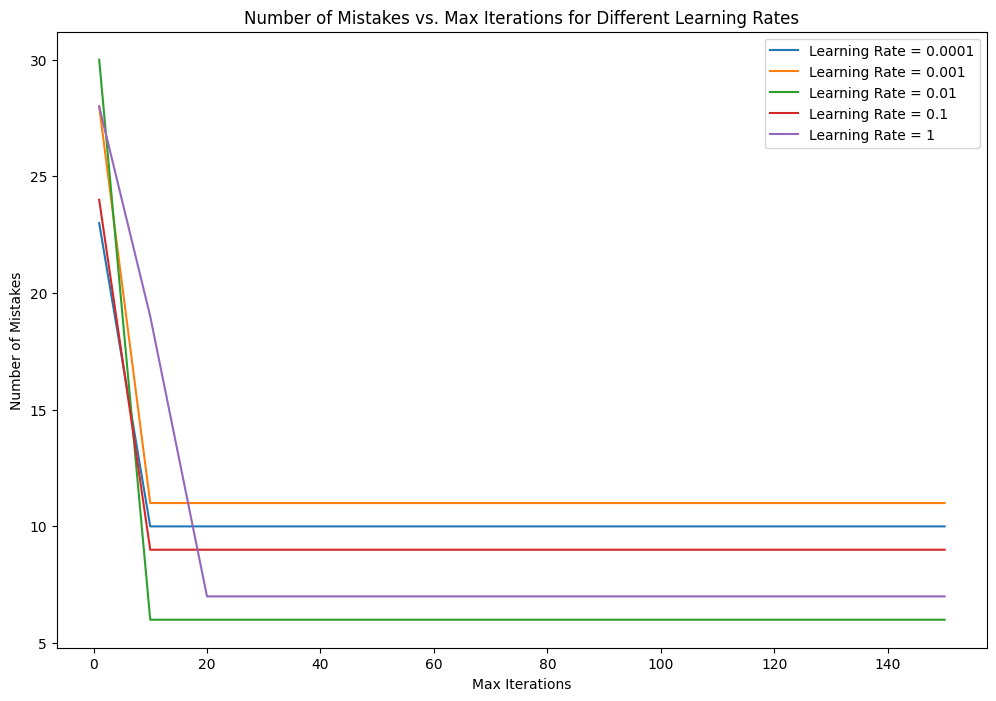

In [26]:
perceptron_optimal(edm_binary_train, edm_yTrain, edm_vocab)

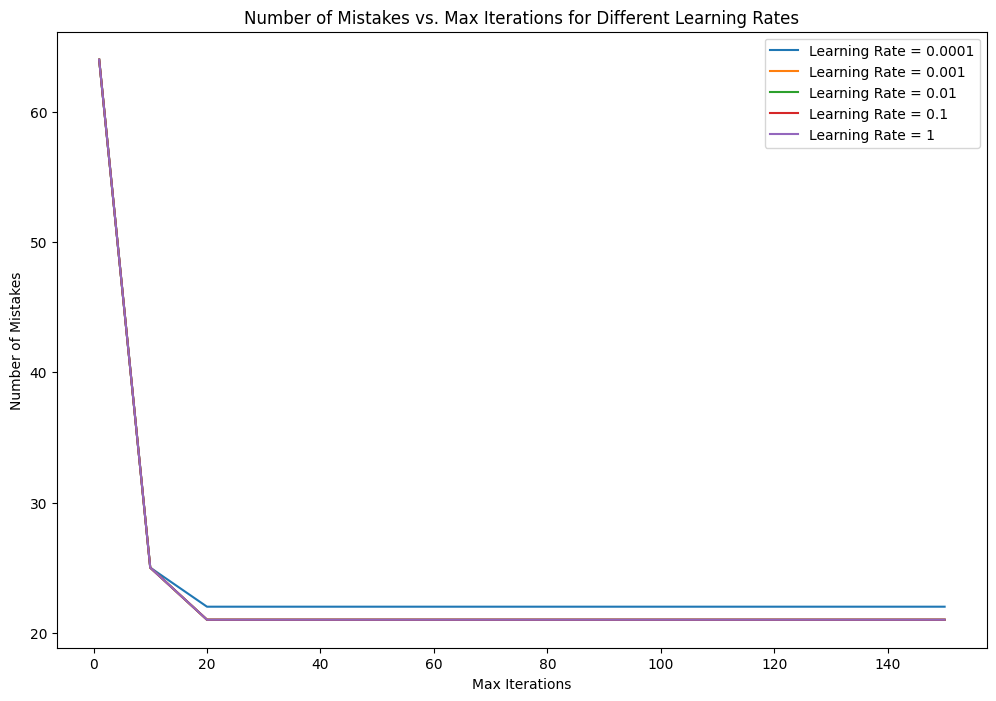

In [27]:
perceptron_optimal(edm_count_train, edm_yTrain, edm_vocab)

In [28]:
edm_max_iters = [20, 20]
edm_learning_rates = [1, 1]

In [29]:
print("Accuracy score on edm dataset")
perceptron_accuracy(edm_binary_train, edm_binary_test, edm_count_train, edm_count_test, edm_yTrain, edm_yTest, edm_vocab, edm_max_iters, edm_learning_rates)

Accuracy score on edm dataset
Number of mistakes on binary train data:  7
Number of mistakes on binary test data:  28
Number of mistakes on count train data:  21
Number of mistakes on count test data:  23
Accuracy score on binary train data:  0.9943089430894309
Accuracy score on binary test data:  0.946969696969697
Accuracy score on count train data:  0.9829268292682927
Accuracy score on count test data:  0.9564393939393939
15 most positive words for binary model: 
['uh', 'lets', 'head', 'feelin', 'girls', 'ever', 'times', 'many', 'oh', 'afraid', 'need', 'long', 'run', 'forget', 'too']
15 most negative words for binary model: 
['ive', 'its', 'put', 'me', 'around', 'hold', 'if', 'think', 'who', 'away', 'tryna', 'air', 'right', 'talk', 'our']
15 most positive words for count model: 
['hate', 'lets', 'than', 'follow', 'id', 'wait', 'sorry', 'until', 'please', 'cool', 'ya', 'made', 'thats', 'youll', 'too']
15 most negative words for count model: 
['ride', 'could', 'day', 'work', 'feel', 'w

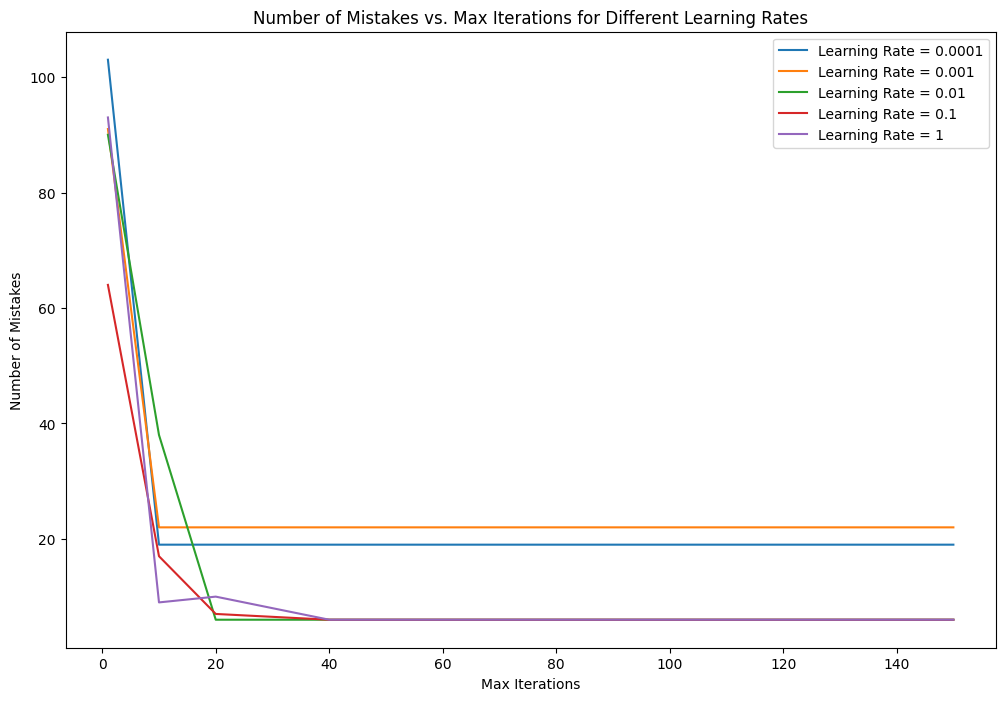

In [30]:
perceptron_optimal(latin_binary_train, latin_yTrain, latin_vocab)

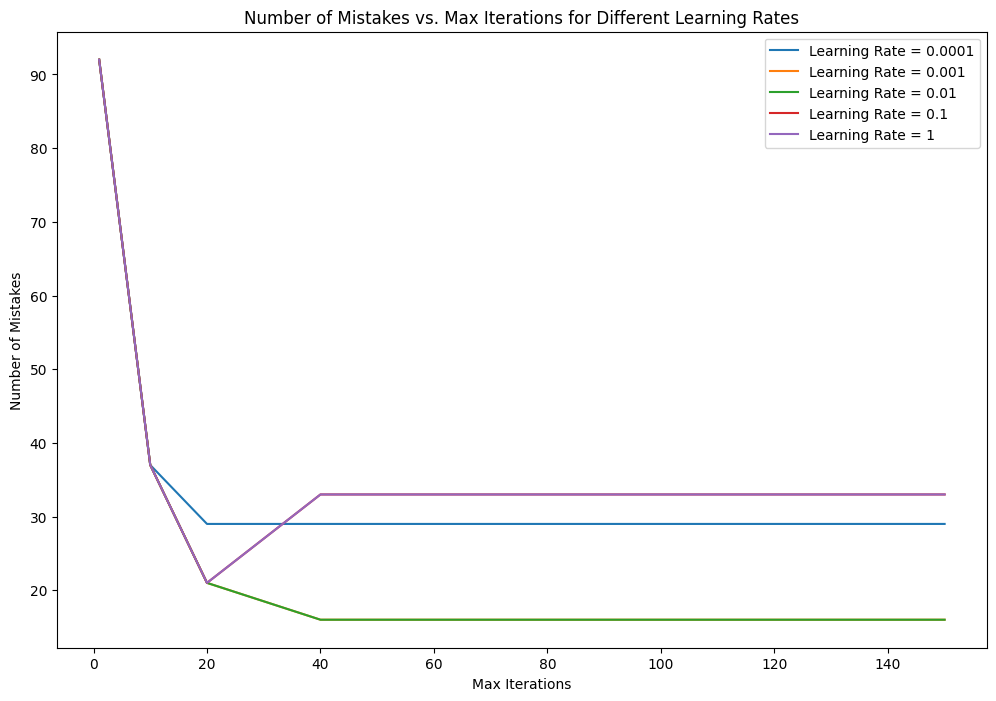

In [31]:
perceptron_optimal(latin_count_train, latin_yTrain, latin_vocab)

In [32]:
latin_max_iters = [40, 40]
latin_learning_rates = [1, 0.01]

In [33]:
print("Accuracy score on latin dataset")
perceptron_accuracy(latin_binary_train, latin_binary_test, latin_count_train, latin_count_test, latin_yTrain, latin_yTest, latin_vocab, latin_max_iters, latin_learning_rates)

Accuracy score on latin dataset
Number of mistakes on binary train data:  6
Number of mistakes on binary test data:  59
Number of mistakes on count train data:  16
Number of mistakes on count test data:  63
Accuracy score on binary train data:  0.989983305509182
Accuracy score on binary test data:  0.7713178294573644
Accuracy score on count train data:  0.9732888146911519
Accuracy score on count test data:  0.7558139534883721
15 most positive words for binary model: 
['name', 'boy', 'life', 'say', 'real', 'friends', 'came', 'cause', 'aint', 'yeah', 'will', 'where', 'made', 'just', 'were']
15 most negative words for binary model: 
['thinking', 'hit', 'care', 'youve', 'told', 'stay', 'see', 'go', 'believe', 'seen', 'the', 'us', 'die', 'only', 'easy']
15 most positive words for count model: 
['keep', 'want', 'would', 'break', 'name', 'friends', 'shes', 'days', 'found', 'aint', 'arms', 'wanna', 'around', 'crazy', 'been']
15 most negative words for count model: 
['hit', 'from', 'us', 'as', 

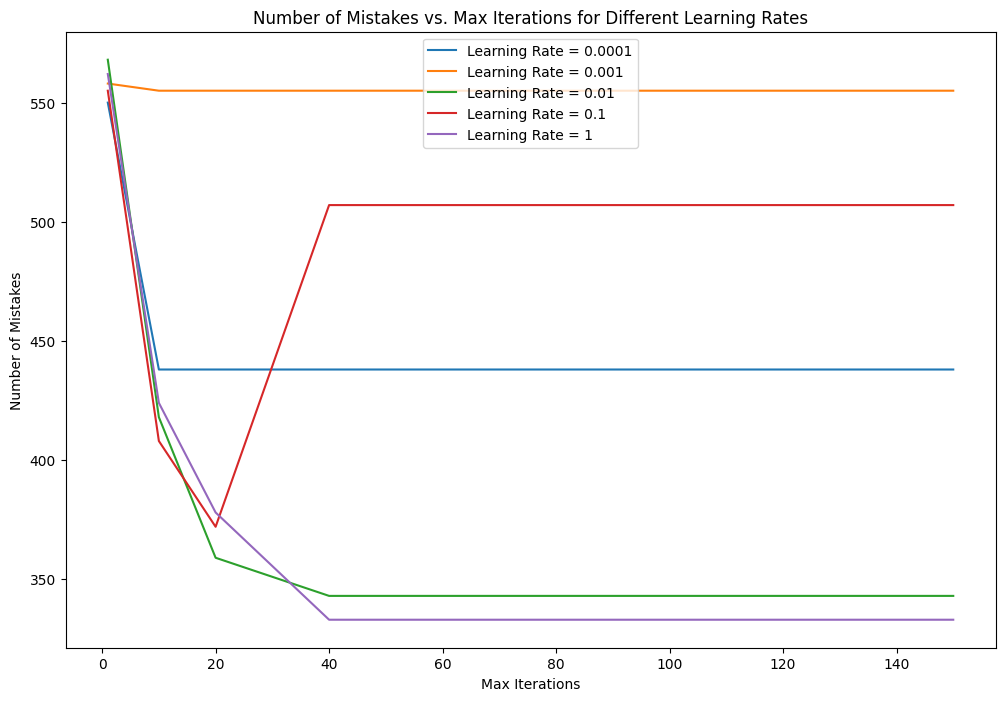

In [34]:
perceptron_optimal(pop_binary_train, pop_yTrain, pop_vocab)

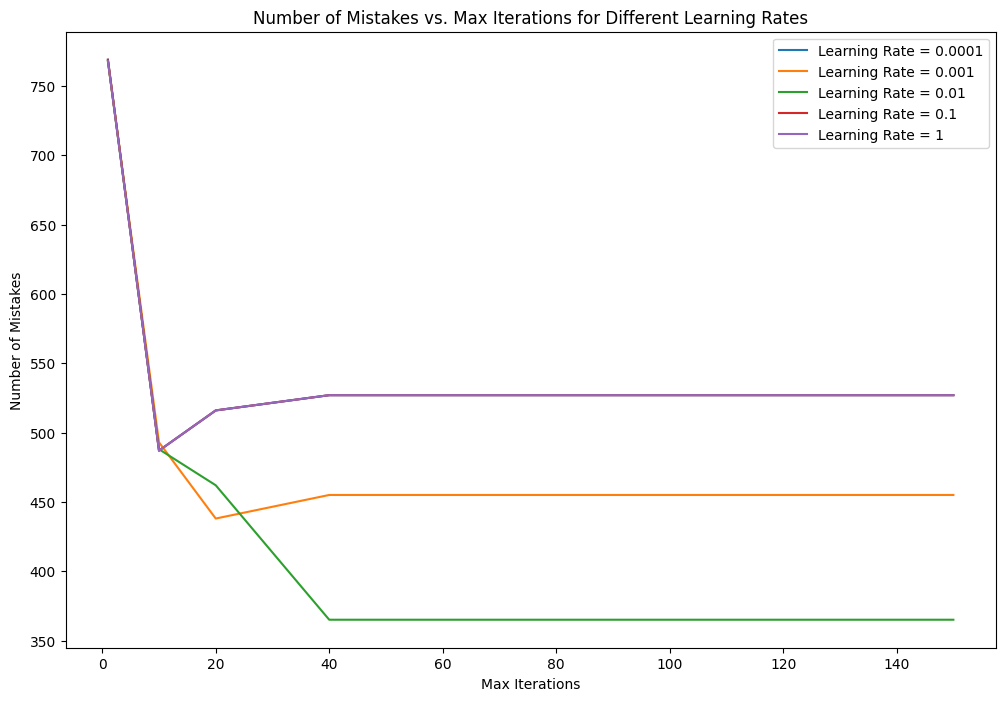

In [35]:
perceptron_optimal(pop_count_train, pop_yTrain, pop_vocab)

In [36]:
pop_max_iters = [40, 40]
pop_learning_rates = [1, 0.01]

In [37]:
print("Accuracy score on pop dataset")
perceptron_accuracy(pop_binary_train, pop_binary_test, pop_count_train, pop_count_test, pop_yTrain, pop_yTest, pop_vocab, pop_max_iters, pop_learning_rates)

Accuracy score on pop dataset
Number of mistakes on binary train data:  333
Number of mistakes on binary test data:  368
Number of mistakes on count train data:  365
Number of mistakes on count test data:  309
Accuracy score on binary train data:  0.8727550630492931
Accuracy score on binary test data:  0.6720142602495544
Accuracy score on count train data:  0.8605273213603363
Accuracy score on count test data:  0.7245989304812834
15 most positive words for binary model: 
['runnin', 'falls', 'woman', 'guys', 'bitches', 'ends', 'outta', 'pass', 'starting', 'ayy', 'lover', 'walked', 'lord', 'count', 'lie']
15 most negative words for binary model: 
['searching', 'belong', 'letting', 'tongue', 'needs', 'doing', 'heat', 'strange', 'eat', 'worry', 'hair', 'wasting', 'fill', 'explain', 'fit']
15 most positive words for count model: 
['lucky', 'runnin', 'woman', 'outta', 'point', 'yourself', 'child', 'lover', 'locked', 'single', 'fast', 'afraid', 'dust', 'voice', 'type']
15 most negative words 

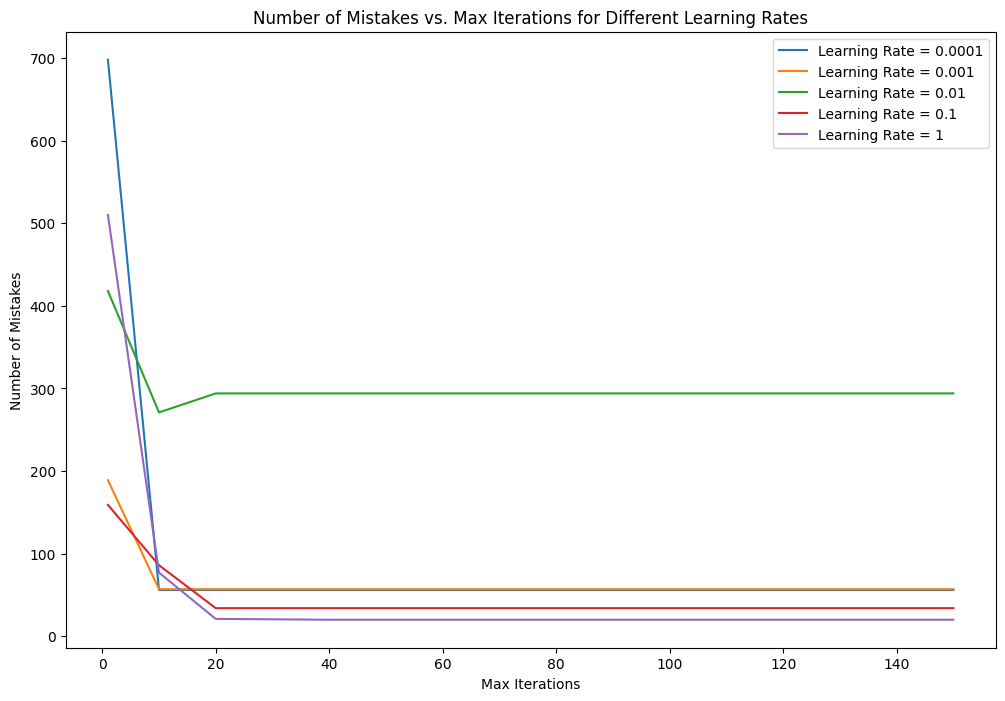

In [38]:
perceptron_optimal(rap_binary_train, rap_yTrain, rap_vocab)

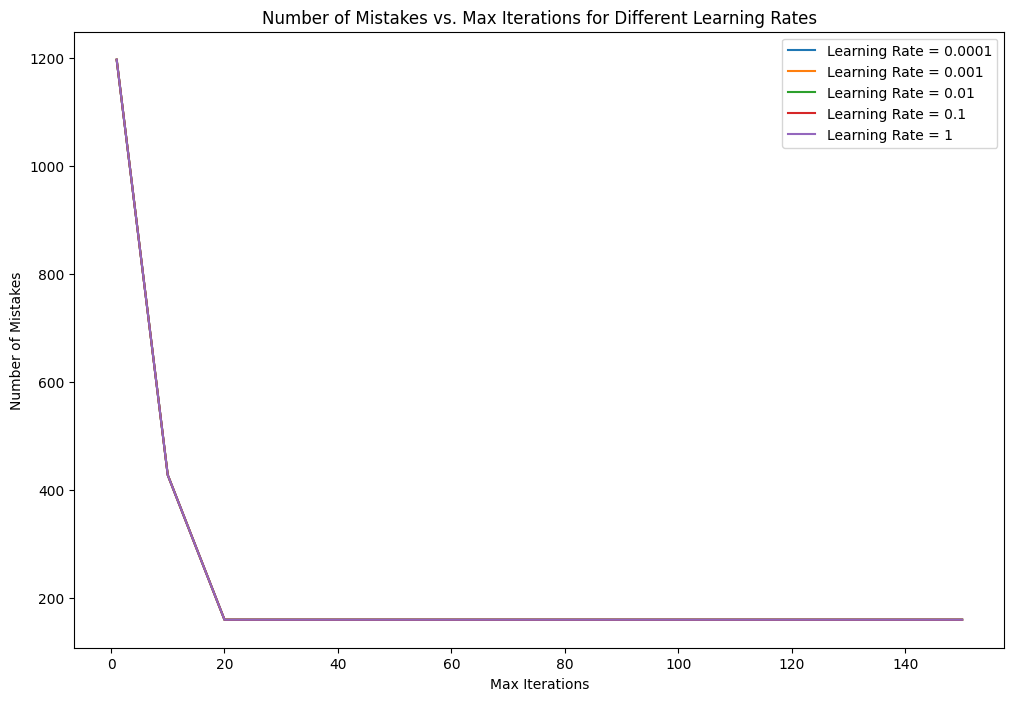

In [39]:
perceptron_optimal(rap_count_train, rap_yTrain, rap_vocab)

In [40]:
rap_max_iters = [40, 20]
rap_learning_rates = [1, 1]

In [41]:
print("Accuracy score on rap dataset")
perceptron_accuracy(rap_binary_train, rap_binary_test, rap_count_train, rap_count_test, rap_yTrain, rap_yTest, rap_vocab, rap_max_iters, rap_learning_rates)

Accuracy score on rap dataset
Number of mistakes on binary train data:  20
Number of mistakes on binary test data:  130
Number of mistakes on count train data:  160
Number of mistakes on count test data:  99
Accuracy score on binary train data:  0.9885779554540263
Accuracy score on binary test data:  0.8268974700399467
Accuracy score on count train data:  0.9086236436322102
Accuracy score on count test data:  0.8681757656458056
15 most positive words for binary model: 
['bleed', 'switch', 'ayy', 'jealous', 'huh', 'fame', 'go', 'dollar', 'sippin', 'outta', 'pocket', 'section', 'dont', 'benz', 'chose']
15 most negative words for binary model: 
['hood', 'weve', 'neck', 'wit', 'now', 'else', 'freak', 'imma', 'shootin', 'tonight', 'ball', 'started', 'runnin', 'didnt', 'most']
15 most positive words for count model: 
['waitin', 'diamonds', 'scared', 'ring', 'meant', 'dogg', 'weekend', 'dat', 'lord', 'fly', 'while', 'news', 'times', 'nah', 'sippin']
15 most negative words for count model: 
['

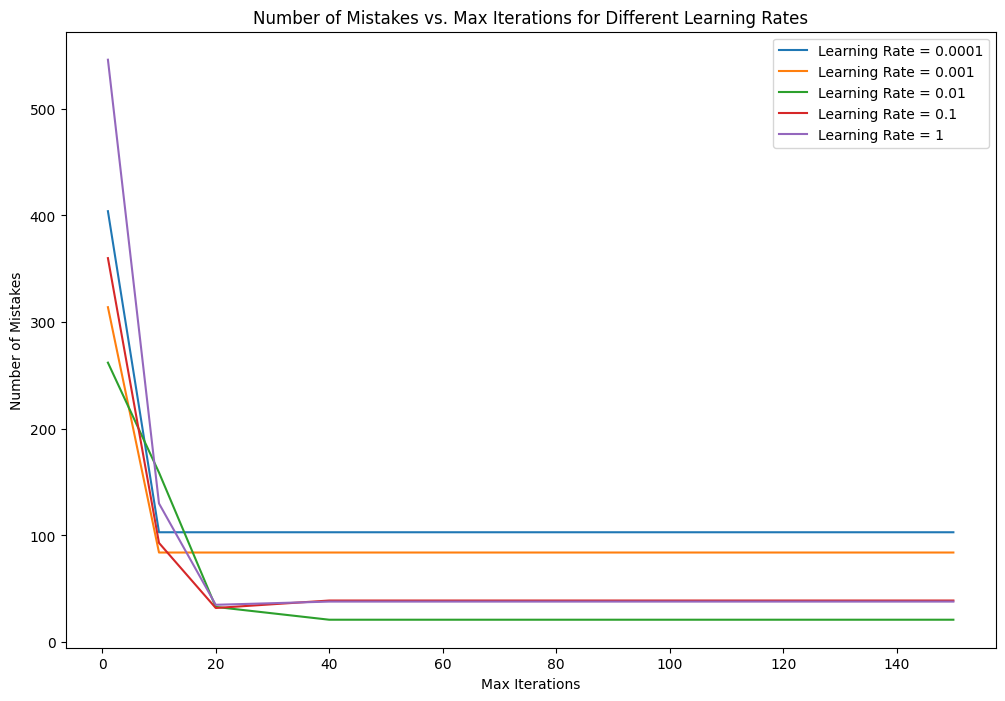

In [42]:
perceptron_optimal(rb_binary_train, rb_yTrain, rb_vocab)

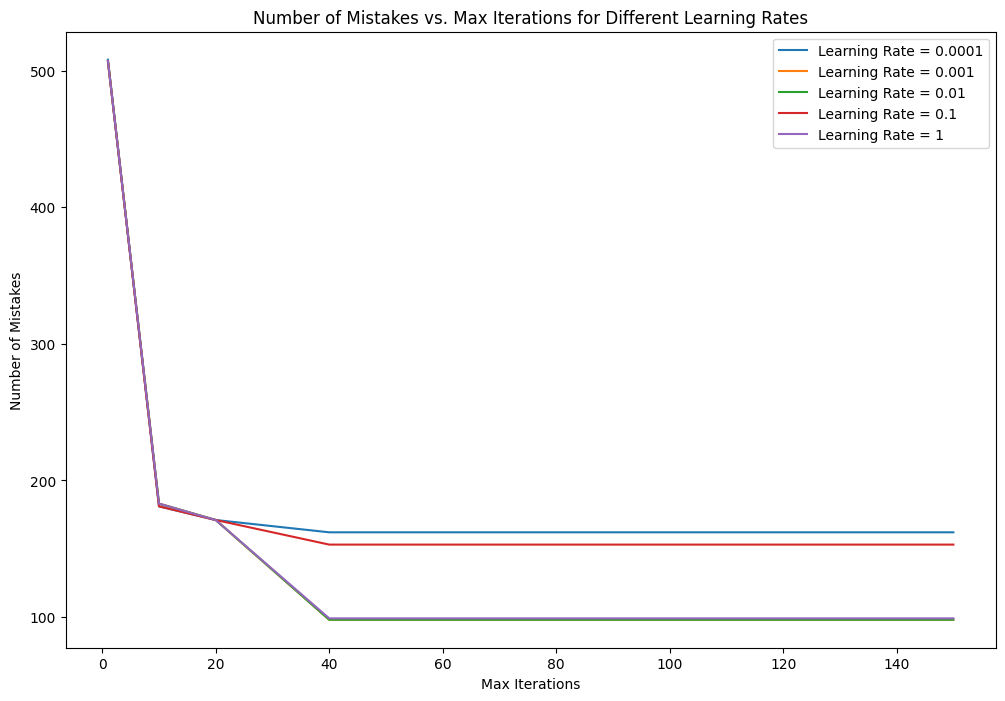

In [54]:
perceptron_optimal(rb_count_train, rb_yTrain, rb_vocab)

In [55]:
rb_max_iters = [20, 40]
rb_learning_rates = [0.01, 0.01]

In [56]:
print("Accuracy score on rb dataset")
perceptron_accuracy(rb_binary_train, rb_binary_test, rb_count_train, rb_count_test, rb_yTrain, rb_yTest, rb_vocab, rb_max_iters, rb_learning_rates)

Accuracy score on rb dataset
Number of mistakes on binary train data:  33
Number of mistakes on binary test data:  151
Number of mistakes on count train data:  98
Number of mistakes on count test data:  142
Accuracy score on binary train data:  0.9850813743218807
Accuracy score on binary test data:  0.8408851422550052
Accuracy score on count train data:  0.9556962025316456
Accuracy score on count test data:  0.8503688092729189
15 most positive words for binary model: 
['skin', 'ass', 'hurts', 'walls', 'heard', 'freak', 'brother', 'build', 'dry', 'needs', 'mad', 'ten', 'nasty', 'drink', 'track']
15 most negative words for binary model: 
['damn', 'wouldnt', 'cuz', 'pick', 'everyday', 'already', 'oooh', 'bar', 'find', 'music', 'seems', 'tomorrow', 'legs', '2', 'em']
15 most positive words for count model: 
['break', 'caught', 'songs', 'skin', 'stars', 'scared', 'cross', 'seen', 'waitin', 'else', 'build', 'moves', 'done', 'hair', 'perfect']
15 most negative words for count model: 
['damn',

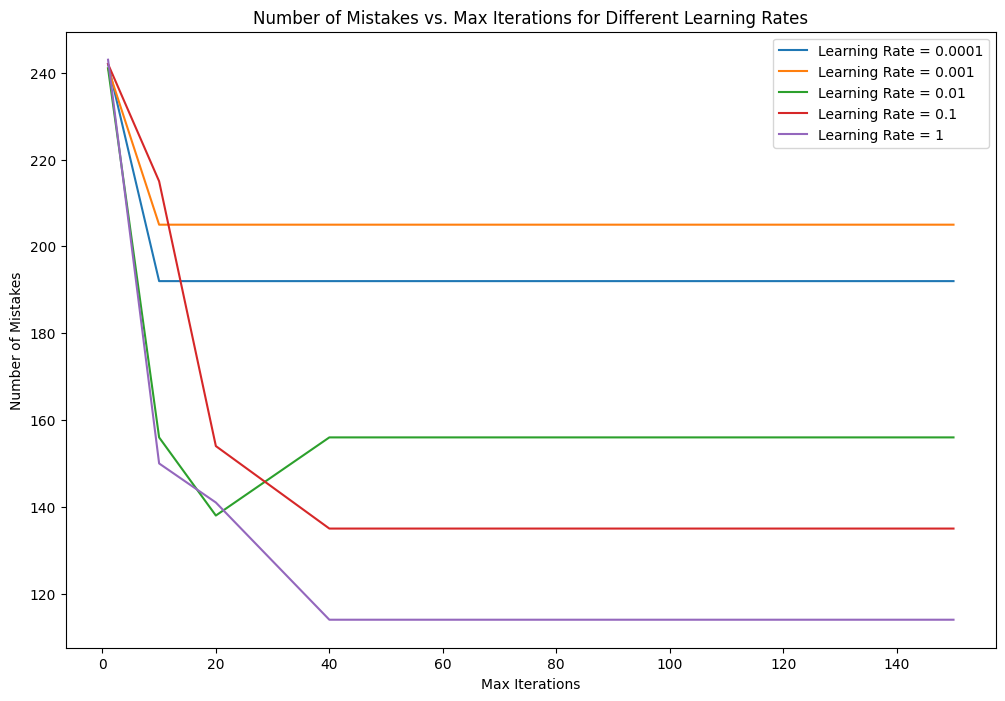

In [57]:
perceptron_optimal(rock_binary_train, rock_yTrain, rock_vocab)

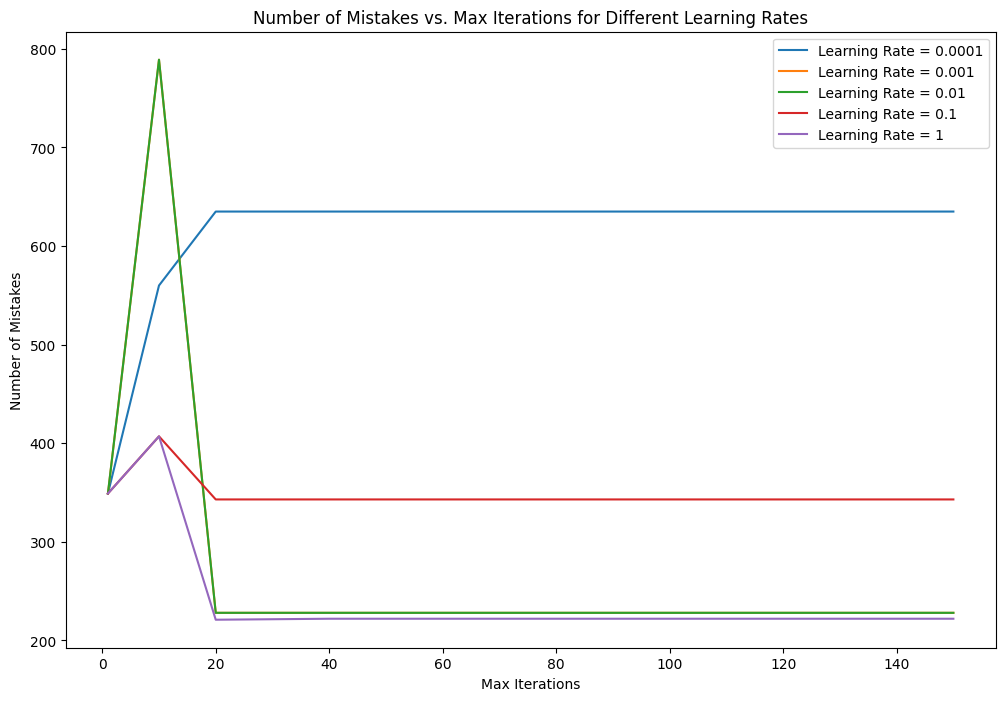

In [58]:
perceptron_optimal(rock_count_train, rock_yTrain, rock_vocab)

In [59]:
rock_max_iters = [40, 20]
rock_learning_rates = [1, 1]

In [60]:
print("Accuracy score on rock dataset")
perceptron_accuracy(rock_binary_train, rock_binary_test, rock_count_train, rock_count_test, rock_yTrain, rock_yTest, rock_vocab, rock_max_iters, rock_learning_rates)

Accuracy score on rock dataset
Number of mistakes on binary train data:  114
Number of mistakes on binary test data:  240
Number of mistakes on count train data:  221
Number of mistakes on count test data:  137
Accuracy score on binary train data:  0.9519190215099115
Accuracy score on binary test data:  0.7640117994100295
Accuracy score on count train data:  0.906790383804302
Accuracy score on count test data:  0.8652900688298918
15 most positive words for binary model: 
['corner', 'death', 'lead', 'forget', 'mmm', 'hurts', 'sand', 'children', 'turned', 'places', 'somewhere', 'having', 'bet', 'awake', 'older']
15 most negative words for binary model: 
['thinking', 'surely', 'school', 'door', 'huh', 'follow', 'lord', 'beyond', 'swear', 'enough', 'lifes', 'listen', 'golden', 'could', 'worth']
15 most positive words for count model: 
['whole', 'dry', 'though', 'highway', 'stop', 'runnin', 'kiss', 'dust', 'part', 'throw', 'sound', 'did', 'silence', 'maybe', 'speak']
15 most negative words 

In [61]:
def multinomial(x_train, x_test, y_train, y_test):
    params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* 2, ]
         }

    multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
    multinomial_nb_grid.fit(x_train, y_train)

    print('Best Accuracy Through Grid Search : {:.3f}'.format(multinomial_nb_grid.best_score_))
    print('Best Parameters : {}\n'.format(multinomial_nb_grid.best_params_))

    # Test the classifier on the test set and print the accuracy
    y_testpred = multinomial_nb_grid.predict(x_test)
    num_testmistakes = sum(y_testpred != y_test)
    y_trainpred = multinomial_nb_grid.predict(x_train)
    num_trainmistakes = sum(y_trainpred != y_train)
    train_accuracy = accuracy_score(y_train, y_trainpred)
    test_accuracy = accuracy_score(y_test, y_testpred)
    print('NB Train Accuracy:', train_accuracy)
    print('NB Number of trainmistakes:', num_trainmistakes)
    print('NB Test Accuracy:', test_accuracy)
    print('NB Number of testmistakes:', num_testmistakes)
    print()


In [62]:
print('Multinomial EDM Binary')
multinomial(edm_binary_train, edm_binary_test, edm_yTrain, edm_yTest)
print('Multinomial EDM Count')
multinomial(edm_count_train, edm_count_test, edm_yTrain, edm_yTest)
print('Multinomial Latin Binary')
multinomial(latin_binary_train, latin_binary_test, latin_yTrain, latin_yTest)
print('Multinomial Latin Count')
multinomial(latin_count_train, latin_count_test, latin_yTrain, latin_yTest)
print('Multinomial Pop Binary')
multinomial(pop_binary_train, pop_binary_test, pop_yTrain, pop_yTest)
print('Multinomial Pop Count')
multinomial(pop_count_train, pop_count_test, pop_yTrain, pop_yTest)
print('Multinomial Rap Binary')
multinomial(rap_binary_train, rap_binary_test, rap_yTrain, rap_yTest)
print('Multinomial Rap Count')
multinomial(rap_count_train, rap_count_test, rap_yTrain, rap_yTest)
print('Multinomial RB Binary')
multinomial(rb_binary_train, rb_binary_test, rb_yTrain, rb_yTest)
print('Multinomial RB Count')
multinomial(rb_count_train, rb_count_test, rb_yTrain, rb_yTest)
print('Multinomial Rock Binary')
multinomial(rock_binary_train, rock_binary_test, rock_yTrain, rock_yTest)
print('Multinomial Rock Count')
multinomial(rock_count_train, rock_count_test, rock_yTrain, rock_yTest)
print('Multinomial Total Binary')
multinomial(total_binary_train, total_binary_test, total_yTrain, total_yTest)
print('Multinomial Total Count')
multinomial(total_count_train, total_count_test, total_yTrain, total_yTest)

Multinomial EDM Binary
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.978
Best Parameters : {'alpha': 10.0, 'class_prior': None, 'fit_prior': True}

NB Train Accuracy: 0.9780487804878049
NB Number of trainmistakes: 27
NB Test Accuracy: 0.9678030303030303
NB Number of testmistakes: 17

Multinomial EDM Count
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.948
Best Parameters : {'alpha': 0.01, 'class_prior': None, 'fit_prior': True}

NB Train Accuracy: 0.9439024390243902
NB Number of trainmistakes: 69
NB Test Accuracy: 0.9242424242424242
NB Number of testmistakes: 40

Multinomial Latin Binary
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Accuracy Through Grid Search : 0.876
Best Parameters : {'alpha': 10.0, 'class_prior': None, 'fit_prior': True}

NB Train Accuracy: 0.8764607679465777
NB Number of trainmistakes: 74
NB Test Accuracy: 0.8604651162790697
NB Number of 

In [63]:
from sklearn import preprocessing


In [64]:
def Logistic(x_train, x_test, y_train, y_test):
  # Logistic Regression
  params = {'C': np.logspace(-3,3,7),
          'penalty': ['l1', 'l2', None, 'elasticnet']}
  logreg_grid = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)
  logreg_grid.fit(x_train, y_train)
  print('Best Accuracy Through Grid Search : {:.3f}'.format(logreg_grid.best_score_))
  print('Best Parameters : {}\n'.format(logreg_grid.best_params_))

  # Test the classifier on the test set and print the accuracy
  y_testpred = logreg_grid.predict(x_test)
  num_testmistakes = sum(y_testpred != y_test)
  y_trainpred = logreg_grid.predict(x_train)
  num_trainmistakes = sum(y_trainpred != y_train)
  train_accuracy = accuracy_score(y_train, y_trainpred)
  test_accuracy = accuracy_score(y_test, y_testpred)
  print('Logistic Regression Train Accuracy:', train_accuracy)
  print('Logistic Regression Number of trainmistakes:', num_trainmistakes)
  print('Logistic Regression Test Accuracy:', test_accuracy)
  print('Logistic Regression Number of testmistakes:', num_testmistakes)
  print()

In [65]:
print('Logistic EDM Binary')
Logistic(edm_binary_train, edm_binary_test, edm_yTrain, edm_yTest)
print('Logistic EDM Count')
Logistic(edm_count_train, edm_count_test, edm_yTrain, edm_yTest)
print('Logistic Latin Binary')
Logistic(latin_binary_train, latin_binary_test, latin_yTrain, latin_yTest)
print('Logistic Latin Count')
Logistic(latin_count_train, latin_count_test, latin_yTrain, latin_yTest)
print('Logistic Pop Binary')
Logistic(pop_binary_train, pop_binary_test, pop_yTrain, pop_yTest)
print('Logistic Pop Count')
Logistic(pop_count_train, pop_count_test, pop_yTrain, pop_yTest)
print('Logistic Rap Binary')
Logistic(rap_binary_train, rap_binary_test, rap_yTrain, rap_yTest)
print('Logistic Rap Count')
Logistic(rap_count_train, rap_count_test, rap_yTrain, rap_yTest)
print('Logistic RB Binary')
Logistic(rb_binary_train, rb_binary_test, rb_yTrain, rb_yTest)
print('Logistic RB Count')
Logistic(rb_count_train, rb_count_test, rb_yTrain, rb_yTest)
print('Logistic Rock Binary')
Logistic(rock_binary_train, rock_binary_test, rock_yTrain, rock_yTest)
print('Logistic Rock Count')
Logistic(rock_count_train, rock_count_test, rock_yTrain, rock_yTest)
print('Logistic Total Binary')
Logistic(total_binary_train, total_binary_test, total_yTrain, total_yTest)
print('Logistic Total Count')
Logistic(total_count_train, total_count_test, total_yTrain, total_yTest)

Logistic EDM Binary
Best Accuracy Through Grid Search : 0.978
Best Parameters : {'C': 0.001, 'penalty': 'l2'}

Logistic Regression Train Accuracy: 0.9780487804878049
Logistic Regression Number of trainmistakes: 27
Logistic Regression Test Accuracy: 0.9678030303030303
Logistic Regression Number of testmistakes: 17

Logistic EDM Count
Best Accuracy Through Grid Search : 0.977
Best Parameters : {'C': 0.001, 'penalty': 'l2'}

Logistic Regression Train Accuracy: 0.9788617886178862
Logistic Regression Number of trainmistakes: 26
Logistic Regression Test Accuracy: 0.9678030303030303
Logistic Regression Number of testmistakes: 17

Logistic Latin Binary
Best Accuracy Through Grid Search : 0.886
Best Parameters : {'C': 0.001, 'penalty': 'l2'}

Logistic Regression Train Accuracy: 0.8864774624373957
Logistic Regression Number of trainmistakes: 68
Logistic Regression Test Accuracy: 0.8565891472868217
Logistic Regression Number of testmistakes: 37

Logistic Latin Count
Best Accuracy Through Grid Sea

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
dflyrics = pd.read_csv('dat.csv')
dflyrics.head()

,track_popularity,track_id,track_name,track_artist,lyrics_dim_0,lyrics_dim_1,lyrics_dim_2,lyrics_dim_3,lyrics_dim_4,lyrics_dim_5,...,lyrics_dim_759,lyrics_dim_760,lyrics_dim_761,lyrics_dim_762,lyrics_dim_763,lyrics_dim_764,lyrics_dim_765,lyrics_dim_766,lyrics_dim_767,playlist_genre
0,41.0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,-0.058687,-0.051955,-0.041783,-0.061065,-0.042640,-0.002660,...,0.020256,-0.018545,0.018808,-0.054817,-0.039611,-0.043657,0.003283,-0.060941,-0.047902,rock
1,28.0,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,-0.065967,-0.027921,-0.034698,-0.068686,0.048735,0.051609,...,-0.001439,0.010046,-0.011507,-0.007592,-0.031035,-0.030660,-0.038726,-0.010946,-0.063177,rock
2,0.0,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,-0.056247,-0.042539,-0.012083,-0.057370,-0.037971,-0.025456,...,0.010023,-0.041546,-0.005336,-0.009253,-0.006841,-0.015273,-0.013107,-0.005469,-0.065129,r&b
3,41.0,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,-0.049499,-0.042787,0.000948,-0.063282,-0.021570,-0.018737,...,0.019300,-0.042911,0.035587,0.012431,0.000324,-0.029698,-0.021657,-0.038497,-0.075374,r&b
4,65.0,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,-0.023482,-0.004275,-0.011224,-0.044246,-0.009216,0.022312,...,-0.029638,-0.028636,0.038760,-0.061289,-0.006527,-0.065773,0.023386,0.017876,0.004447,pop


In [74]:
target = 'track_popularity'

In [75]:
selected_features = []

In [76]:
df_filtered = dflyrics.loc[:, ~dflyrics.columns.isin(['track_id', 'track_name', 'track_artist', 'playlist_genre'])]
df_filtered

,track_popularity,lyrics_dim_0,lyrics_dim_1,lyrics_dim_2,lyrics_dim_3,lyrics_dim_4,lyrics_dim_5,lyrics_dim_6,lyrics_dim_7,lyrics_dim_8,...,lyrics_dim_758,lyrics_dim_759,lyrics_dim_760,lyrics_dim_761,lyrics_dim_762,lyrics_dim_763,lyrics_dim_764,lyrics_dim_765,lyrics_dim_766,lyrics_dim_767
0,41.0,-0.058687,-0.051955,-0.041783,-0.061065,-0.042640,-0.002660,-0.060148,0.003739,-0.053391,...,-0.035234,0.020256,-0.018545,0.018808,-0.054817,-0.039611,-0.043657,0.003283,-0.060941,-0.047902
1,28.0,-0.065967,-0.027921,-0.034698,-0.068686,0.048735,0.051609,-0.046426,-0.006113,0.004367,...,0.012796,-0.001439,0.010046,-0.011507,-0.007592,-0.031035,-0.030660,-0.038726,-0.010946,-0.063177
2,0.0,-0.056247,-0.042539,-0.012083,-0.057370,-0.037971,-0.025456,-0.056762,0.039184,-0.042830,...,-0.025969,0.010023,-0.041546,-0.005336,-0.009253,-0.006841,-0.015273,-0.013107,-0.005469,-0.065129
3,41.0,-0.049499,-0.042787,0.000948,-0.063282,-0.021570,-0.018737,-0.075551,-0.002493,-0.007746,...,0.030141,0.019300,-0.042911,0.035587,0.012431,0.000324,-0.029698,-0.021657,-0.038497,-0.075374
4,65.0,-0.023482,-0.004275,-0.011224,-0.044246,-0.009216,0.022312,-0.085818,0.036650,-0.002408,...,0.046152,-0.029638,-0.028636,0.038760,-0.061289,-0.006527,-0.065773,0.023386,0.017876,0.004447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18449,0.0,-0.022080,-0.046012,-0.042908,-0.074712,-0.027986,-0.016963,-0.069969,0.029518,0.017201,...,0.011659,-0.010858,-0.053230,0.046540,0.001976,-0.007717,-0.019403,-0.054377,-0.055344,-0.056183
18450,49.0,-0.043650,-0.032551,0.014667,-0.068469,-0.028351,-0.033002,-0.055935,0.004362,-0.023672,...,-0.025805,0.002589,0.001362,0.021950,0.001042,-0.021788,-0.041522,-0.020971,-0.062170,-0.062724
18451,40.0,-0.039533,-0.056906,-0.028727,-0.075754,-0.012442,0.029250,-0.025079,0.007055,0.005050,...,0.013610,0.003484,0.045978,-0.013944,-0.008594,-0.034756,0.051471,-0.011013,-0.016164,-0.056572
18452,36.0,-0.057966,-0.042716,-0.042541,-0.068077,0.020891,-0.050059,-0.046311,-0.004288,-0.058813,...,0.025315,-0.011429,-0.003833,-0.034951,-0.010543,-0.018614,-0.008536,0.003438,-0.063159,-0.064101


In [77]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
components = pca.fit_transform(df_filtered)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=dflyrics['track_popularity'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3',  'color': 'Popularity'}
)
fig.show()

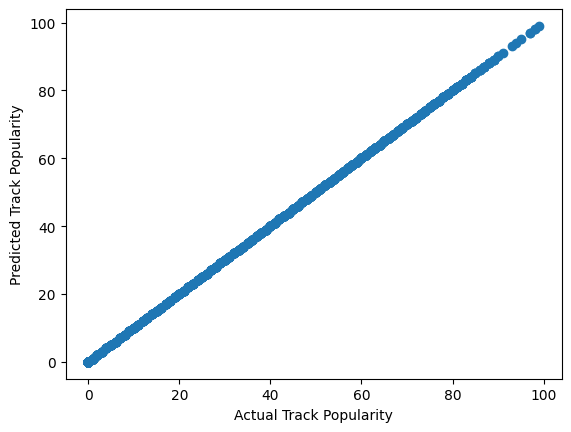

In [78]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# assume df is the DataFrame with 768-dimensional input features and 'track_popularity' as the output variable
X = df_filtered
y = dflyrics['track_popularity']

# apply PCA to reduce the number of dimensions to 3
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# fit a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# visualize the predictions against the actual values in a scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Track Popularity")
plt.ylabel("Predicted Track Popularity")
plt.show()


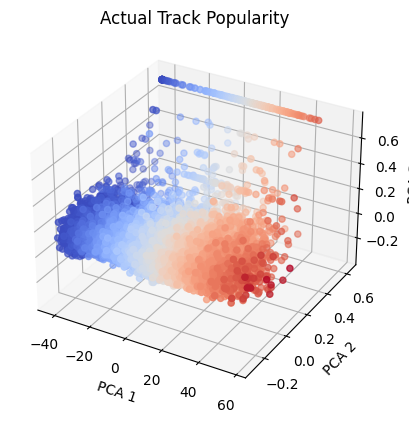

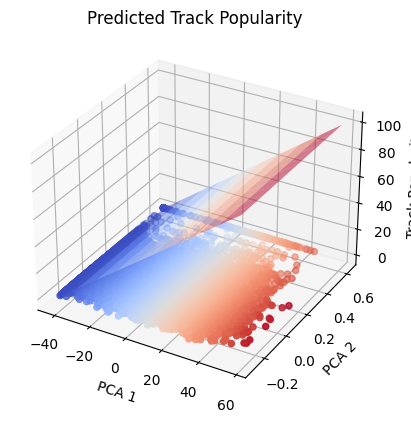

In [79]:
from mpl_toolkits.mplot3d import Axes3D

# apply PCA to reduce the number of dimensions to 3
X = df_filtered
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
y = dflyrics['track_popularity']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

# fit a linear regression model on the training set
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the training set
y_pred = model.predict(X_train)

# create a 3D scatter plot of the training set input features
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('Actual Track Popularity')
plt.show()

# create a 3D scatter plot of the training set input features with the predicted values as a regression plane
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='coolwarm')
x1, x2 = np.meshgrid(np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 10), 
                     np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 10))
y_pred_plane = model.predict(np.c_[x1.ravel(), x2.ravel(), np.zeros_like(x1.ravel())])
y_pred_plane = y_pred_plane.reshape(x1.shape)
ax.plot_surface(x1, x2, y_pred_plane, alpha=0.5, cmap='coolwarm')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('Track Popularity')
ax.set_title('Predicted Track Popularity')
plt.show()


In [80]:
X_pca

array([[-1.43880473e+00, -1.00012432e-01,  2.42359602e-01],
       [-1.44388227e+01, -8.16035799e-02,  2.59207917e-02],
       [-4.24388096e+01,  3.73484154e-02,  6.24377485e-02],
       ...,
       [-2.43879986e+00,  2.31731629e-01, -1.55092978e-01],
       [-6.43882204e+00, -1.43119110e-01,  1.15286003e-02],
       [ 1.85611828e+01, -9.92217323e-02, -5.31669874e-03]])

In [81]:
y_pred = model.predict(X_test)
y_pred

array([1.30000284e+01, 6.10000024e+01, 5.59999926e+01, ...,
       1.59289027e-05, 5.80000029e+01, 6.00000046e+01])

In [82]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))
print("R^2 Score: {:.2f}".format(r2))

Mean Squared Error: 0.00
R^2 Score: 1.00


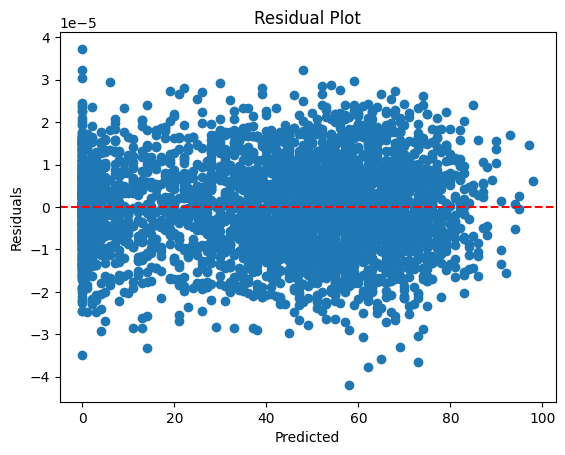

In [83]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

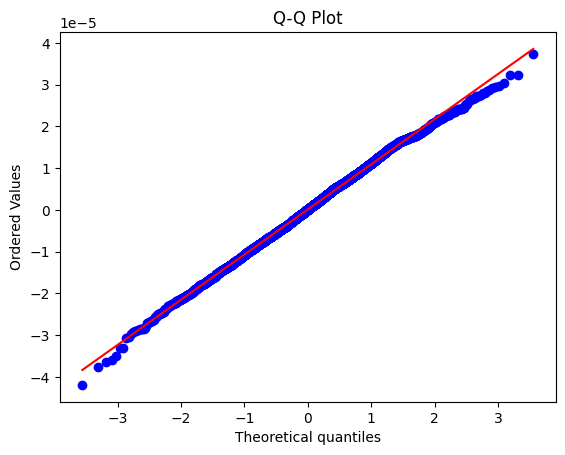

In [84]:
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

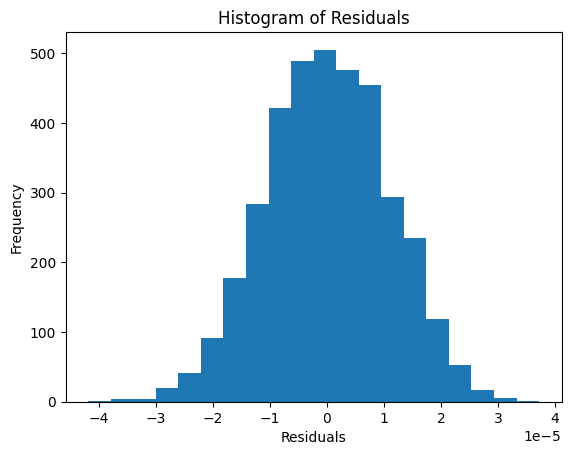

In [85]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

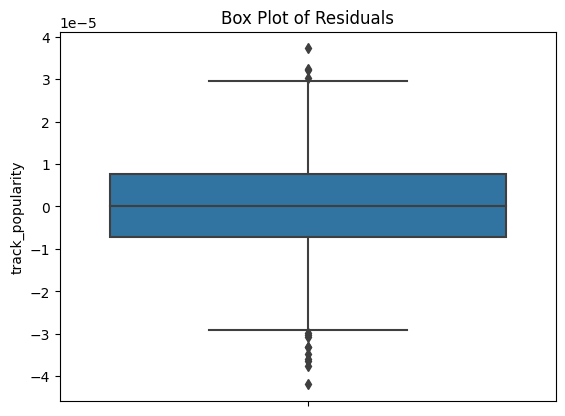

In [86]:
sns.boxplot(y=residuals)
plt.title('Box Plot of Residuals')
plt.show()